In [1]:
# %pip install plotly
# %pip install ipywidgets
from IPython.display import HTML
import plotly.io as pio
pio.renderers.default = "notebook_connected"
HTML('''<button type="button" class="btn btn-outline-danger"  onclick="codeToggle();">Toggle Code</button>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tarfile
import io
import requests
from functools import reduce

from raceplotly.plots import barplot


In [3]:
# takes 1-3 mins
country_dataframes = {}
metadata_dataframes = {}
country_code_region_df = None
with tarfile.open(r'data\wid_all_data.tar.gz', 'r:gz') as tar:
    for member in tar.getmembers():
        if member.isfile():
            file_obj = tar.extractfile(member)
            if file_obj is None:
                continue
            filename = member.name
            if filename.endswith('.csv'):
                df = pd.read_csv(file_obj,delimiter=';')
                if 'WID_countries' in filename:
                    country_code_region_df = df
                elif 'metadata' in filename:
                    metadata_dataframes[filename.split('/')[1][:-4]] = df
                else:
                    country_dataframes[filename.split('/')[1][:-4]] = df

In [94]:
continent_codes = {
    "Africa": "QB",
    "Asia": "QD",
    "Europe": "QE",
    "North America": "QP",
    "South America": "QR",
    "Oceania": "QF"
}
continent_df = {key:country_dataframes[f'WID_data_{val}'] for key,val in continent_codes.items()}
continent_meta_data_df = {key:metadata_dataframes[f'WID_metadata_{val}'] for key,val in continent_codes.items()}


KeyError: 'WID_data_QB'

In [239]:
for var in good_vars:
    if not all([var in continent_df[continent]["variable"].unique() for continent in continent_codes.keys()]):
        print(f"Variable {var} not in all continents")

In [ ]:
def corr(vars, continent):
    assert continent in continent_codes.keys(), f"Continent {continent} not found"
    for var in vars:
        assert var in continent_df[continent]["variable"].unique(), f"Variable {var} not found in {continent}"
    df = continent_df[continent]
    years_together = set()
    valarrs = []
    for var in vars:
        var_df = df[df["variable"] == var]
        var_df = var_df.dropna(subset=["value"])
        assert len(var_df) == len(set(var_df["year"])), f"Variable {var} has duplicate years in {continent}"
        assert len(var_df) > 0, f"Variable {var} has no data in {continent}"
        years_together = set(var_df["year"]).intersection(years_together) if years_together else set(var_df["year"])
    
    for var in vars:
        var_df = df[df["variable"] == var]
        var_df = var_df.dropna(subset=["value"])
        var_df = var_df[var_df["year"].isin(years_together)]
        valarrs.append(var_df["value"].values)
    
    assert len(set(len(arr) for arr in valarrs)) == 1, "All variables must have the same number of years"
    assert len(valarrs) == len(vars), "All variables must be present in the data"
    assert len(years_together) > 0, "No years in common for the selected variables"
    
    print(f"Years in common for {continent}: {len(years_together)}")
    
    # print(valarrs)
    correlation = np.corrcoef(valarrs)
    return correlation

In [245]:
# FInding min value in a matrix
def find_min_value(matrix):
    min_value = float('inf')
    min_index = (-1, -1)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] < min_value:
                min_value = matrix[i][j]
                min_index = (i, j)
    return min_value, min_index

min_value, min_index = find_min_value(cormats[2])

In [ ]:
prefixes = set()
for i in good_vars:
    prefixes.add(i[:-3])

265


In [247]:
min_index

(297, 298)

In [134]:
def get_code(title_name):
    if title_name in country_code_region_df["titlename"].to_list():
        return country_code_region_df[country_code_region_df["titlename"]==title_name]["alpha2"].values
    
    elif title_name in country_code_region_df["shortname"].to_list():
            return country_code_region_df[country_code_region_df["shortname"]==title_name]["alpha2"].values
    else:
        raise ValueError(f"Country name '{title_name}' not found in country_code_region_df")
    

array(['CN'], dtype=object)

In [121]:
"Andorra" in country_code_region_df["titlename"].to_list()

True

,alpha2,titlename,shortname,region,region2
0,AD,Andorra,Andorra,Europe,Western Europe
1,AE,the United Arab Emirates,United Arab Emirates,Asia,West Asia
2,AF,Afghanistan,Afghanistan,Asia,South Asia
3,AG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean
4,AI,Anguilla,Anguilla,Americas,Caribbean
...,...,...,...,...,...
395,YU,Yugoslavia,Yugoslavia,Europe,Eastern Europe
396,ZA,South Africa,South Africa,Africa,South Africa
397,ZM,Zambia,Zambia,Africa,East Africa
398,ZW,Zimbabwe,Zimbabwe,Africa,East Africa


In [101]:
country_code_region_df[country_code_region_df["alpha2"] == "QB"]

,alpha2,titlename,shortname,region,region2
216,QB,Africa,Africa,NaN,NaN


In [102]:
print(deleted_rows)

45      CN-RU
46      CN-UR
57      DE-BD
58      DE-BY
59      DE-HB
        ...  
389    XQ-MER
390        XR
391    XR-MER
392        XS
393    XS-MER
Name: alpha2, Length: 159, dtype: object


In [5]:
deleted_rows = country_code_region_df[country_code_region_df.isnull().any(axis=1)]['alpha2']
for i in deleted_rows:
    try:
        country_dataframes.pop(f"WID_data_{i}")
    except:
        pass

In [96]:
print(len(deleted_rows))

159


In [6]:
continent_gdp = {key:continent_df[key][continent_df[key]['variable'] == 'mgdproi999'][['year','value']] for key in continent_df.keys()}
continent_gdp_df = pd.concat(
    [
        df.assign(continent=continent) 
        for continent, df in continent_gdp.items()
    ],
    ignore_index=True
)[['continent', 'year', 'value']]

my_raceplot = barplot(continent_gdp_df,
                      item_column='continent',
                      value_column='value',
                      time_column='year')

my_raceplot.plot(
    title='GDP by Continent',
    item_label='Continent',
    value_label='GDP (EUR Trillions)',
    frame_duration=300,
    date_format = '%Y',
    time_label='Year: '
)

In [ ]:
(country_dataframes['WID_data_CN']["variable"].unique())

1152

In [27]:
[continent_df[cont]["country"].unique() for cont in continent_df.keys()]

[array(['QB'], dtype=object),
 array(['QD'], dtype=object),
 array(['QE'], dtype=object),
 array(['QP'], dtype=object),
 array(['QR'], dtype=object),
 array(['QF'], dtype=object)]

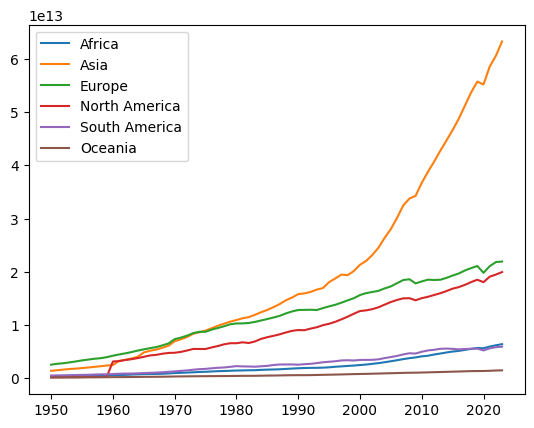

In [ ]:
for continent in continent_df.keys():
    # continent = "Asia"
    vals = continent_gdp_df[continent_gdp_df["continent"] == continent]["value"]
    years = continent_gdp_df[continent_gdp_df["continent"] == continent]["year"]
    plt.plot(years,vals, label=continent)
plt.legend()

In [83]:
all_vars = set()
for continent in continent_df.keys():
    all_vars = all_vars.union(set(continent_df[continent]["variable"].unique()))

print(len(all_vars))

473


In [60]:
def compare(coun1, coun2, var):
    # coun1 = "Germany"
    # coun2 = "France"
    data1 = country_dataframes[f"WID_data_{coun1}"][country_dataframes[f"WID_data_{coun1}"]['variable'] == var][['year','value']]
    data2 = country_dataframes[f"WID_data_{coun2}"][country_dataframes[f"WID_data_{coun2}"]['variable'] == var][['year','value']]
    years1 = data1['year']
    years2 = data2['year']
    vals1 = data1['value']
    vals2 = data2['value']
    plt.plot(years1,vals1, label=coun1)
    plt.plot(years2,vals2, label=coun2)
    plt.legend()
    plt.title(f"{coun1} vs {coun2}")
    # plt.plot(years,np.log(vals1), label=coun1)
    # plt.plot(years,np.log(vals2), label=coun2)
    # plt.legend()
    # plt.title(f"{coun1} vs {coun2}")
    plt.show()




In [ ]:
def corr(vars, continent):
    assert continent in continent_codes.keys(), f"Continent {continent} not found"
    for var in vars:
        assert var in continent_df[continent]["variable"].unique(), f"Variable {var} not found in {continent}"
    df = continent_df[continent]
    years_together = set()
    valarrs = []
    for var in vars:
        var_df = df[df["variable"] == var]
        var_df = var_df.dropna(subset=["value"])
        assert len(var_df) == len(set(var_df["year"])), f"Variable {var} has duplicate years in {continent}"
        assert len(var_df) > 0, f"Variable {var} has no data in {continent}"
        years_together = set(var_df["year"]).intersection(years_together) if years_together else set(var_df["year"])
    
    for var in vars:
        var_df = df[df["variable"] == var]
        var_df = var_df.dropna(subset=["value"])
        var_df = var_df[var_df["year"].isin(years_together)]
        valarrs.append(var_df["value"].values)
    
    assert len(set(len(arr) for arr in valarrs)) == 1, "All variables must have the same number of years"
    assert len(valarrs) == len(vars), "All variables must be present in the data"
    assert len(years_together) > 0, "No years in common for the selected variables"
    
    print(f"Years in common for {continent}: {len(years_together)}")
    
    # print(valarrs)
    correlation = np.corrcoef(valarrs)
    return correlation

In [ ]:
corr(["ehfcari999", "afinpxi992", "ennghgi999"], "Africa")

In [ ]:
def get_good_vars(continent):
    assert continent in continent_codes.keys(), f"Continent {continent} not found"
    df = continent_df[continent]
    good_vars = []
    for var in df["variable"].unique():
        var_df = df[df["variable"] == var]
        var_df = var_df.dropna(subset=["value"])
        if (len(var_df) == len(set(var_df["year"]))) and (len(var_df) > 0):
            good_vars.append(var)
    return good_vars

good_varset = set()

good_var_list = []
for continent in continent_codes.keys():
    good_vars = get_good_vars(continent)
    good_var_list.append(good_vars)
    print(f"Continent: {continent}, Good vars: {len(good_vars)}")
# Preserve the order of the vars

good_vars = []

for listt in good_var_list:
    for var in listt:
        if var not in good_varset and all([var in good_var_list[i] for i in range(len(good_var_list))]):
            good_varset.add(var)
            good_vars.append(var)

print(f"Good vars: {len(good_vars)}")

for var in good_vars:
    if not all([var in good_var_list[i] for i in range(len(good_var_list))]):
        print(f"Variable {var} not in all continents")


array(['aconfci992', 'agdproi992', 'agdproi999', 'agninci992',
       'agninci999', 'ancanxi992', 'ancanxi999', 'andproi992',
       'andproi999', 'anninci992', 'aconfci999', 'anninci999',
       'inyixxi999', 'mconfci999', 'aptfrni992', 'aptfrni999',
       'aptfrpi999', 'aptfrri992', 'afsubxi992', 'afsubxi999',
       'aftaxxi992', 'aftaxxi999', 'mgdproi999', 'mgninci999',
       'mncanxi999', 'mndproi999', 'mnninci999', 'aptfrpi992',
       'aptfrri999', 'mptfrpi999', 'ataxnxi999', 'ataxnxi992',
       'wconfci999', 'wgdproi999', 'wncanxi999', 'mfsubxi999',
       'mftaxxi999', 'mptfrni999', 'mptfrri999', 'xlceupi999',
       'xlcuspi999', 'xlcusxi999', 'xlcyupi999', 'mtaxnxi999',
       'npopulf001', 'npopuli001', 'npopulm001', 'npopulf014',
       'npopuli014', 'npopulm014', 'npopulf051', 'npopuli051',
       'npopulm051', 'npopulf101', 'npopuli101', 'npopulm101',
       'npopulf111', 'npopuli111', 'npopulm111', 'npopulf151',
       'npopuli151', 'npopulm151', 'npopulf156', 'npopu

In [ ]:
cormats = []
for continent in continent_codes.keys():
    cormat = corr(good_vars, continent)
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(cormat, cmap='coolwarm')
    plt.colorbar(cax)
    plt.title(f"Correlation Matrix for {continent}")
    plt.tight_layout()
    plt.show()
    cormats.append(cormat)
